In [93]:
import pandas as pd
import math
import numpy as np
import lmfit
import h5py
import csv 
import os
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d, interp2d, griddata
from scipy.misc import derivative
from scipy.optimize import fsolve

import warnings; warnings.simplefilter('ignore')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib inline

def get_module_path():
    # path = os.path.dirname(os.path.abspath(__file__))
    path = os.getcwd()
    return path


def get_file_path(foldername, filename):
    return os.path.join(get_module_path(), foldername, filename)

def load_csv_file(filepath):
    with open(filepath, "r") as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=",")
        fields = next(csv_reader)
        dict_data = {field: [] for field in fields}
        for row in csv_reader:
            for i, x in enumerate(row):
                field = fields[i]
                dict_data[field].append(float(x))

    dict_data = {k: np.array(v) for k, v in list(dict_data.items())}

    return dict_data


### Crosstalk

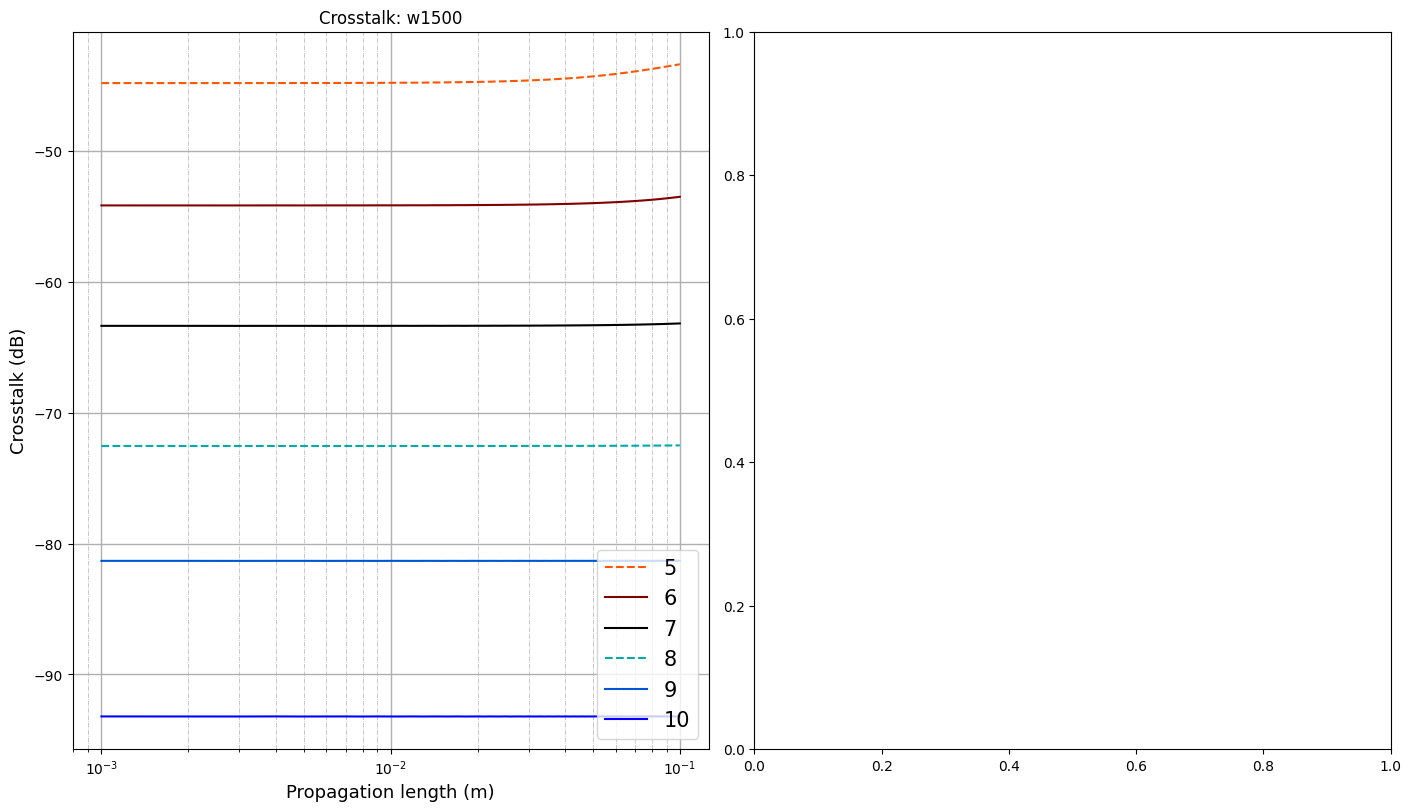

In [94]:

foldername = '/Users/qwang/Downloads/Results_port'
EMEspan = np.arange(1e-3, 101e-3, 1e-3)
width_array = [5000,6000,7000,8000,9000,10000]
wavelength_array = [1561]
wavelength = wavelength_array[0]*1e-3 #in um


#width=1.5um
data_d5000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[0])+'_numWGs2_port1.csv'))
data_d6000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[1])+'_numWGs2_port1.csv'))
data_d7000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[2])+'_numWGs2_port1.csv'))
data_d8000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[3])+'_numWGs2_port1.csv'))
data_d9000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[4])+'_numWGs2_port1.csv'))
data_d10000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[5])+'_numWGs2_port1.csv'))


#EMEspan = csv_w1500_d4000_2wgs['Prop length [mm]']

fig, ax = plt.subplots(1, 2, figsize = [14,8], constrained_layout=True)
axlbl_fontsize = 13
current_ax = ax[0]
current_ax.grid(which = 'major', linewidth = 1)
current_ax.grid(which = 'minor', linewidth = 0.5, linestyle = '-.')
current_ax.set_xscale("log")
current_ax.set_xlabel("Propagation length (m)", fontsize= axlbl_fontsize)
current_ax.set_ylabel("Crosstalk (dB)", fontsize= axlbl_fontsize)
current_ax.set_title('Crosstalk: w1500')
#current_ax.set_xlim([1E1, 1E4])

i=3
current_ax.plot(EMEspan, data_d5000['Crosstalk'], color=plt.cm.gist_heat((i-1)/i), linestyle='--')
current_ax.plot(EMEspan, data_d6000['Crosstalk'], color=plt.cm.gist_heat((i-2)/i))
current_ax.plot(EMEspan, data_d7000['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
current_ax.plot(EMEspan, data_d8000['Crosstalk'], color=plt.cm.winter((i-1)/i), linestyle='--')
current_ax.plot(EMEspan, data_d9000['Crosstalk'], color=plt.cm.winter((i-2)/i))
current_ax.plot(EMEspan, data_d10000['Crosstalk'], color=plt.cm.winter((i-3)/i))

#current_ax.plot(EMEspan,  csv_w1500_d4000_3wgs['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
current_ax.legend(['5','6','7','8','9','10'], loc='lower right', prop={'size':15})


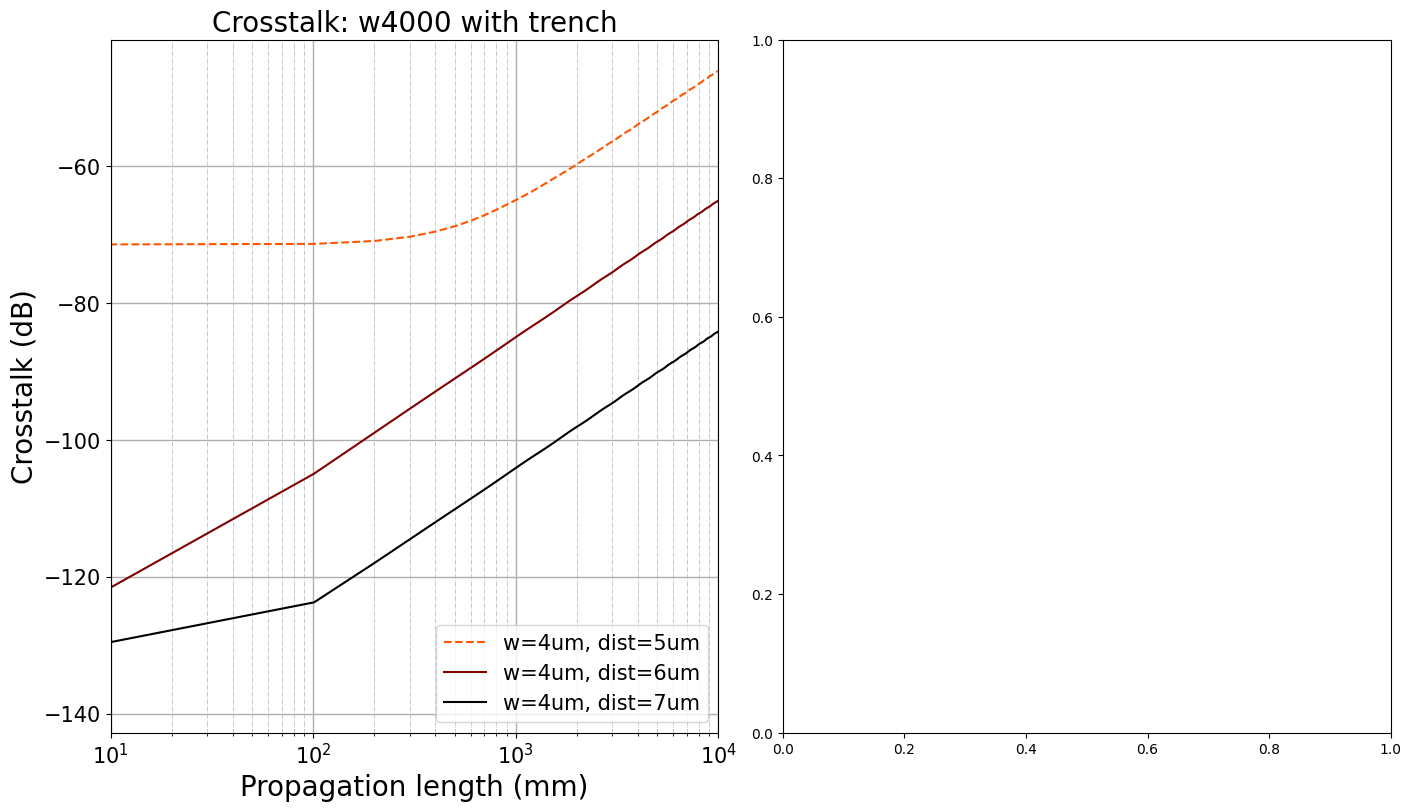

In [101]:

foldername = '/Users/qwang/Downloads/result_4um_mode_record'
EMEspan = np.arange(1, 10000, 100) #mm
width_array = [5000,6000,7000,8000,9000]
wavelength_array = [1561]
wavelength = wavelength_array[0]*1e-3 #in um


#width=1.5um
data_d5000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[0])+'_numWGs2_port1.csv'))
data_d6000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[1])+'_numWGs2_port1.csv'))
data_d7000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[2])+'_numWGs2_port1.csv'))
data_d8000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[3])+'_numWGs2_port1.csv'))
data_d9000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[4])+'_numWGs2_port1.csv'))
#data_d10000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[5])+'_numWGs2_port1.csv'))


#EMEspan = csv_w1500_d4000_2wgs['Prop length [mm]']

fig, ax = plt.subplots(1, 2, figsize = [14,8], constrained_layout=True)
axlbl_fontsize = 20
current_ax = ax[0]
current_ax.grid(which = 'major', linewidth = 1)
current_ax.grid(which = 'minor', linewidth = 0.5, linestyle = '-.')
current_ax.set_xscale("log")
current_ax.set_xlabel("Propagation length (mm)", fontsize= axlbl_fontsize)
current_ax.set_ylabel("Crosstalk (dB)", fontsize= axlbl_fontsize)
current_ax.set_title('Crosstalk: w4000 with trench', fontsize= axlbl_fontsize)
current_ax.set_xlim([1E1, 1E4])
current_ax.tick_params(axis='x', labelsize=15)
current_ax.tick_params(axis='y', labelsize=15)

i=3
current_ax.plot(EMEspan, data_d5000['Crosstalk'], color=plt.cm.gist_heat((i-1)/i), linestyle='--')
current_ax.plot(EMEspan, data_d6000['Crosstalk'], color=plt.cm.gist_heat((i-2)/i))
current_ax.plot(EMEspan, data_d7000['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
#current_ax.plot(EMEspan, real(data_d8000['Crosstalk']), color=plt.cm.winter((i-1)/i), linestyle='--')
#current_ax.plot(EMEspan, real(data_d9000['Crosstalk']), color=plt.cm.winter((i-2)/i))
#current_ax.plot(EMEspan, data_d10000['Crosstalk'], color=plt.cm.winter((i-3)/i))

#current_ax.plot(EMEspan,  csv_w1500_d4000_3wgs['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
current_ax.legend(['w=4um, dist=5um','w=4um, dist=6um','w=4um, dist=7um','w=4um, dist=8um','w=1.5um, dist=9um'], loc='lower right', prop={'size':15})


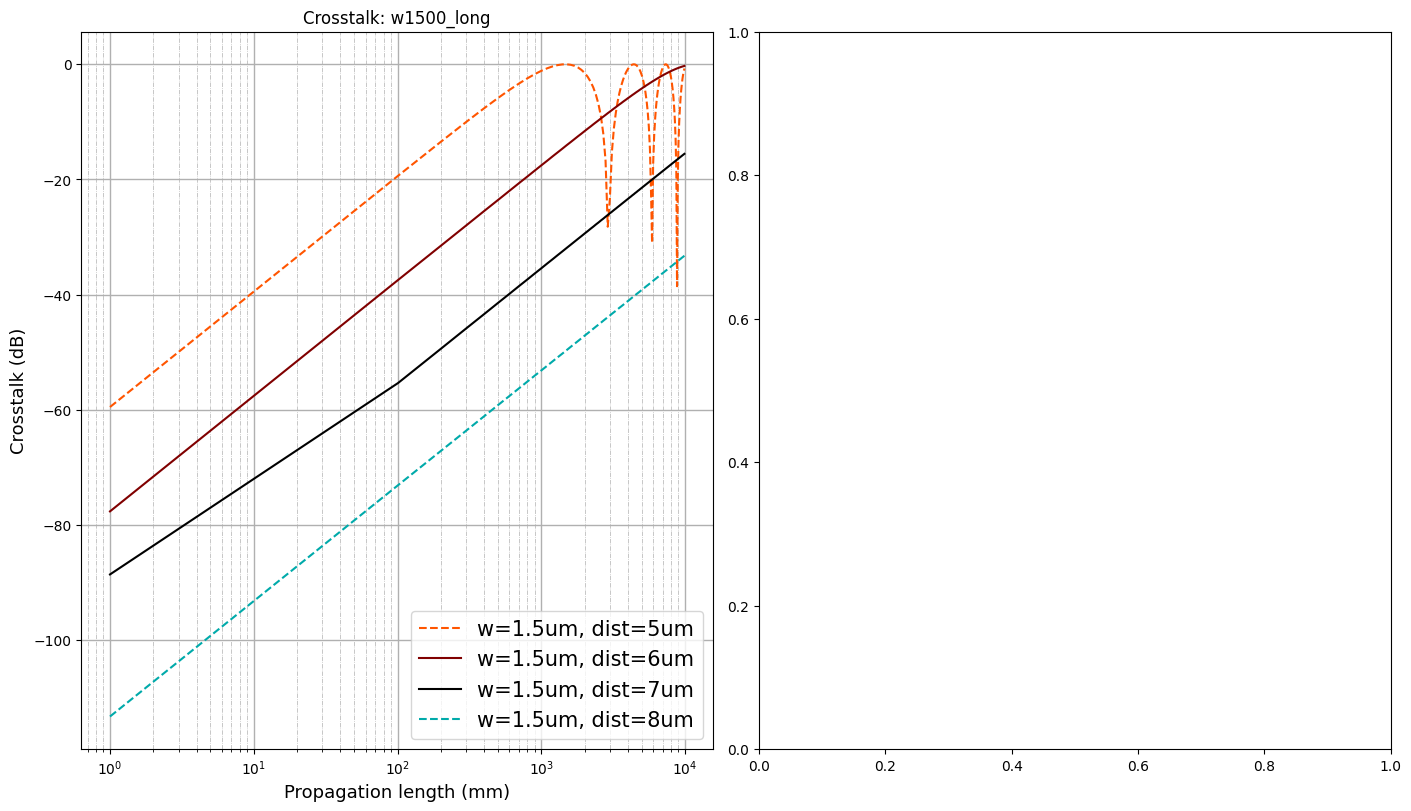

In [103]:

foldername = '/Users/qwang/Downloads/result_1.5um_mode_record_noair'
EMEspan = np.arange(1, 10000, 100) #mm
width_array = [5000,6000,7000,8000,9000,10000]
wavelength_array = [1561]
wavelength = wavelength_array[0]*1e-3 #in um


#width=1.5um
data_d5000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[0])+'_numWGs2_port1.csv'))
data_d6000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[1])+'_numWGs2_port1.csv'))
data_d7000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[2])+'_numWGs2_port1.csv'))
data_d8000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[3])+'_numWGs2_port1.csv'))
data_d9000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[4])+'_numWGs2_port1.csv'))
#data_d10000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[5])+'_numWGs2_port1.csv'))


#EMEspan = csv_w1500_d4000_2wgs['Prop length [mm]']

fig, ax = plt.subplots(1, 2, figsize = [14,8], constrained_layout=True)
axlbl_fontsize = 13
current_ax = ax[0]
current_ax.grid(which = 'major', linewidth = 1)
current_ax.grid(which = 'minor', linewidth = 0.5, linestyle = '-.')
current_ax.set_xscale("log")
current_ax.set_xlabel("Propagation length (mm)", fontsize= axlbl_fontsize)
current_ax.set_ylabel("Crosstalk (dB)", fontsize= axlbl_fontsize)
current_ax.set_title('Crosstalk: w1500_long')
#current_ax.set_xlim([1E1, 1E4])

i=3
current_ax.plot(EMEspan, data_d5000['Crosstalk'], color=plt.cm.gist_heat((i-1)/i), linestyle='--')
current_ax.plot(EMEspan, data_d6000['Crosstalk'], color=plt.cm.gist_heat((i-2)/i))
current_ax.plot(EMEspan, data_d7000['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
current_ax.plot(EMEspan, data_d8000['Crosstalk'], color=plt.cm.winter((i-1)/i), linestyle='--')
#current_ax.plot(EMEspan, data_d9000['Crosstalk'], color=plt.cm.winter((i-2)/i))
#current_ax.plot(EMEspan, data_d10000['Crosstalk'], color=plt.cm.winter((i-3)/i))

#current_ax.plot(EMEspan,  csv_w1500_d4000_3wgs['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
current_ax.legend(['w=1.5um, dist=5um','w=1.5um, dist=6um','w=1.5um, dist=7um','w=1.5um, dist=8um','w=1.5um, dist=9um'], loc='lower right', prop={'size':15})


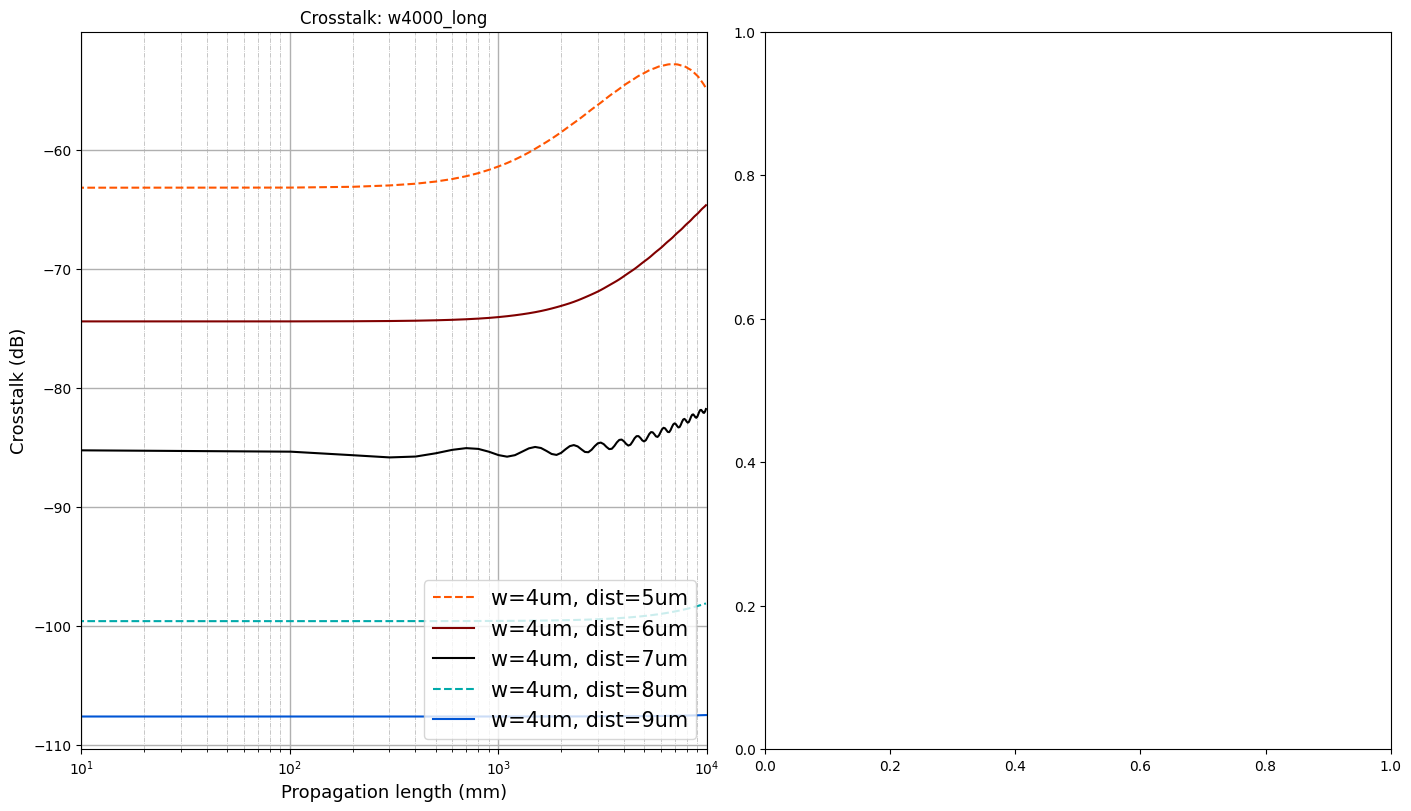

In [80]:

foldername = '/Users/qwang/Downloads/Results_port_long_4umwg'
EMEspan = np.arange(1, 10000, 100) #mm
width_array = [5000,6000,7000,8000,9000,10000]
wavelength_array = [1561]
wavelength = wavelength_array[0]*1e-3 #in um


#width=1.5um
data_d5000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[0])+'_numWGs2_port1.csv'))
data_d6000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[1])+'_numWGs2_port1.csv'))
data_d7000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[2])+'_numWGs2_port1.csv'))
data_d8000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[3])+'_numWGs2_port1.csv'))
data_d9000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w4000_d'+str(width_array[4])+'_numWGs2_port1.csv'))
#data_d10000 = pd.read_csv(get_file_path(foldername,'results_Crosstalk_w1500_d'+str(width_array[5])+'_numWGs2_port1.csv'))


#EMEspan = csv_w1500_d4000_2wgs['Prop length [mm]']

fig, ax = plt.subplots(1, 2, figsize = [14,8], constrained_layout=True)
axlbl_fontsize = 13
current_ax = ax[0]
current_ax.grid(which = 'major', linewidth = 1)
current_ax.grid(which = 'minor', linewidth = 0.5, linestyle = '-.')
current_ax.set_xscale("log")
current_ax.set_xlabel("Propagation length (mm)", fontsize= axlbl_fontsize)
current_ax.set_ylabel("Crosstalk (dB)", fontsize= axlbl_fontsize)
current_ax.set_title('Crosstalk: w4000_long')
current_ax.set_xlim([1E1, 1E4])

i=3
current_ax.plot(EMEspan, data_d5000['Crosstalk'], color=plt.cm.gist_heat((i-1)/i), linestyle='--')
current_ax.plot(EMEspan, data_d6000['Crosstalk'], color=plt.cm.gist_heat((i-2)/i))
current_ax.plot(EMEspan, data_d7000['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
current_ax.plot(EMEspan, data_d8000['Crosstalk'], color=plt.cm.winter((i-1)/i), linestyle='--')
current_ax.plot(EMEspan, data_d9000['Crosstalk'], color=plt.cm.winter((i-2)/i))
#current_ax.plot(EMEspan, data_d10000['Crosstalk'], color=plt.cm.winter((i-3)/i))

#current_ax.plot(EMEspan,  csv_w1500_d4000_3wgs['Crosstalk'], color=plt.cm.gist_heat((i-3)/i))
#current_ax.legend(['w=1.5um, dist=5um','w=1.5um, dist=6um','w=1.5um, dist=7um','w=1.5um, dist=8um','w=1.5um, dist=9um'], loc='lower right', prop={'size':15})
current_ax.legend(['w=4um, dist=5um','w=4um, dist=6um','w=4um, dist=7um','w=4um, dist=8um','w=4um, dist=9um'], loc='lower right', prop={'size':15})


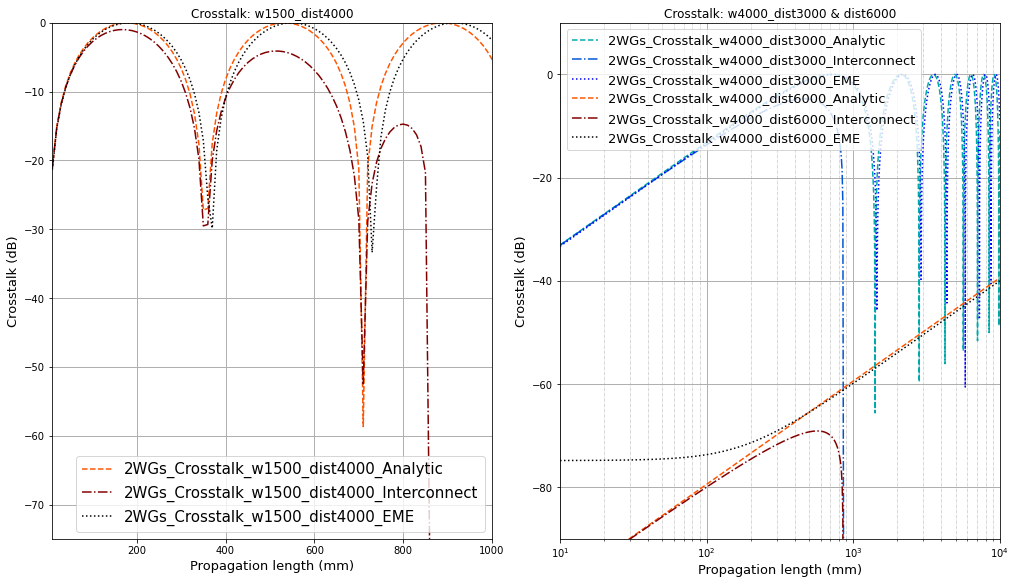

In [59]:
## FDE vs EME vs Interconnect
foldername = 'EME'

csv_w1500_d4000_2wgs = pd.read_csv(get_file_path(foldername, 'EME_Jasmine_crosstalk_w1500_d4000_2wgs.csv'))
csv_w1500_d4000_3wgs = pd.read_csv(get_file_path(foldername, 'EME_Jasmine_crosstalk_w1500_d4000_3wgs.csv'))
csv_w4000_d3000_2wgs = pd.read_csv(get_file_path(foldername, 'EME_Jasmine_crosstalk_w4000_d3000_2wgs.csv'))
csv_w4000_d3000_3wgs = pd.read_csv(get_file_path(foldername, 'EME_Jasmine_crosstalk_w4000_d3000_3wgs.csv'))
csv_w4000_d6000_2wgs = pd.read_csv(get_file_path(foldername, 'EME_Jasmine_crosstalk_w4000_d6000_2wgs.csv'))
csv_w4000_d6000_3wgs = pd.read_csv(get_file_path(foldername, 'EME_Jasmine_crosstalk_w4000_d6000_3wgs.csv'))

EMEspan = csv_w1500_d4000_2wgs['Prop length [mm]']

## Interconnect model
foldername = 'Interconnect'
csv_w1500_d4000_2wgs_INTC = pd.read_csv(get_file_path(foldername, 'Result_Jasmine_crosstalk_w1500_d4000.csv'))
csv_w4000_d3000_2wgs_INTC = pd.read_csv(get_file_path(foldername, 'Result_Jasmine_crosstalk_w4000_d3000.csv'))
csv_w4000_d6000_2wgs_INTC = pd.read_csv(get_file_path(foldername, 'Result_Jasmine_crosstalk_w4000_d6000.csv'))



fig, ax = plt.subplots(1, 2, figsize = [14,8], constrained_layout=True)
axlbl_fontsize = 13
current_ax = ax[0]
current_ax.grid(which = 'major', linewidth = 1)
current_ax.grid(which = 'minor', linewidth = 0.5, linestyle = '-.')
# current_ax.set_xscale("log")
current_ax.set_xlabel("Propagation length (mm)", fontsize= axlbl_fontsize)
current_ax.set_ylabel("Crosstalk (dB)", fontsize= axlbl_fontsize)
current_ax.set_title('Crosstalk: w1500_dist4000')
current_ax.set_xlim([1E1, 1E3])
current_ax.set_ylim([-75, 0])

i=3
current_ax.plot(EMEspan, Through_w1500_dist4000_CT, color=plt.cm.gist_heat((i-1)/i), linestyle='--')
current_ax.plot(csv_w1500_d4000_2wgs_INTC['length(mm)'], csv_w1500_d4000_2wgs_INTC['crosstalk'], color=plt.cm.gist_heat((i-2)/i), linestyle='-.')
current_ax.plot(EMEspan, csv_w1500_d4000_2wgs['Crosstalk'], color=plt.cm.gist_heat((i-3)/i), linestyle=':')
# current_ax.plot(EMEspan,  csv_w1500_d4000_3wgs['Crosstalk'], color=plt.cm.gist_heat((i-4)/i))
current_ax.legend(['4000', '50000',
                   '6000'], loc='lower right', prop={'size':15})

current_ax = ax[1]
current_ax.grid(which = 'major', linewidth = 1)
current_ax.grid(which = 'minor', linewidth = 0.5, linestyle = '-.')
current_ax.set_xscale("log")
current_ax.set_xlabel("Propagation length (mm)", fontsize= axlbl_fontsize)
current_ax.set_ylabel("Crosstalk (dB)", fontsize= axlbl_fontsize)
current_ax.set_title('Crosstalk: w4000_dist3000 & dist6000')
current_ax.set_xlim([1E1, 1E4])
current_ax.set_ylim([-90, 10])

i=3
current_ax.plot(EMEspan, Through_w4000_dist3000_CT, color=plt.cm.winter((i-1)/i), linestyle='--')
current_ax.plot(csv_w4000_d3000_2wgs_INTC['length(mm)'], csv_w4000_d3000_2wgs_INTC['crosstalk'], color=plt.cm.winter((i-2)/i), linestyle='-.')
current_ax.plot(EMEspan, csv_w4000_d3000_2wgs['Crosstalk'], color=plt.cm.winter((i-3)/i), linestyle=':')
# current_ax.plot(EMEspan,  csv_w4000_d3000_3wgs['Crosstalk'], color=plt.cm.winter((i-3)/i))


current_ax.plot(EMEspan, Through_w4000_dist6000_CT, color=plt.cm.gist_heat((i-1)/i), linestyle='--')
current_ax.plot(csv_w4000_d6000_2wgs_INTC['length(mm)'], csv_w4000_d6000_2wgs_INTC['crosstalk'], color=plt.cm.gist_heat((i-2)/i), linestyle='-.')
current_ax.plot(EMEspan, csv_w4000_d6000_2wgs['Crosstalk'], color=plt.cm.gist_heat((i-3)/i), linestyle=':')

# current_ax.plot(EMEspan,  csv_w4000_d6000_3wgs['Crosstalk'], color=plt.cm.winter((i-6)/i))

current_ax.legend(['2WGs_Crosstalk_w4000_dist3000_Analytic', '2WGs_Crosstalk_w4000_dist3000_Interconnect', 
                   '2WGs_Crosstalk_w4000_dist3000_EME',                   
                   '2WGs_Crosstalk_w4000_dist6000_Analytic', '2WGs_Crosstalk_w4000_dist6000_Interconnect', 
                   '2WGs_Crosstalk_w4000_dist6000_EME'], loc='upper left', prop={'size':13})



In [39]:

CC_w2000 = math.pi*delta_n_w2000 / wavelength * 1000 # in mm
CC_w3000 = math.pi*delta_n_w3000 / wavelength * 1000 # in mm
CC_w4000 = math.pi*delta_n_w4000 / wavelength * 1000 # in mm


# Through_w1500 = np.zeros(len(Prop_length))
Through_w1500_dist1000 = -10*np.log10(np.cos(CC_w1500[0] * Prop_length)**2)
Through_w1500_dist2000 = -10*np.log10(np.cos(CC_w1500[2] * Prop_length)**2)
Through_w1500_dist3000 = -10*np.log10(np.cos(CC_w1500[4] * Prop_length)**2)
Through_w1500_dist4000 = -10*np.log10(np.cos(CC_w1500[6] * Prop_length)**2)
Through_w1500_dist5000 = -10*np.log10(np.cos(CC_w1500[8] * Prop_length)**2)
Through_w1500_dist6000 = -10*np.log10(np.cos(CC_w1500[10] * Prop_length)**2)
Through_w1500_dist6500 = -10*np.log10(np.cos(CC_w1500[11] * Prop_length)**2)
Through_w1500_dist7000 = -10*np.log10(np.cos(CC_w1500[12] * Prop_length)**2)
Through_w1500_dist7500 = -10*np.log10(np.cos(CC_w1500[13] * Prop_length)**2)


NameError: name 'delta_n_w2000' is not defined